# Data Preparation

In [1]:
# import libraries
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
import ta
import seaborn as sns
import random
import matplotlib.colors as mcolors


# historical data for Big 8 stocks
tickers = ["AAPL", "MSFT", "GOOGL", "META", "AMZN", "NVDA", "NFLX", "TSLA"]
start = '2017-12-31'
end = '2022-12-31'
today = dt.datetime.today()
adj_price_df = pd.DataFrame()
ohlcv_data = {}

In [2]:
for ticker in tickers:
    adj_price_df[ticker] = yf.download(ticker, start, end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
adj_price_df

,AAPL,MSFT,GOOGL,META,AMZN,NVDA,NFLX,TSLA
Date,,,,,,,,
2018-01-02,40.722878,80.391853,53.660500,181.419998,59.450500,49.317131,201.070007,21.368668
2018-01-03,40.715778,80.765968,54.576000,184.669998,60.209999,52.562870,205.050003,21.150000
2018-01-04,40.904907,81.476814,54.787998,184.330002,60.479500,52.839954,205.630005,20.974667
2018-01-05,41.370628,82.487000,55.514500,186.850006,61.457001,53.287735,209.990005,21.105333
2018-01-08,41.216953,82.571152,55.710499,188.279999,62.343498,54.920502,212.050003,22.427334
...,...,...,...,...,...,...,...,...
2022-12-23,131.127060,237.112076,89.230003,118.040001,85.250000,152.005920,294.959991,123.150002
2022-12-27,129.307236,235.354080,87.389999,116.879997,83.040001,141.159790,284.170013,109.099998
2022-12-28,125.339409,232.940552,86.019997,115.620003,81.820000,140.310074,276.880005,112.709999


# Data Exploration

In [ ]:
daily_return_df = adj_price_df.pct_change()

In [ ]:
(1 + daily_return_df).cumprod().plot(figsize=(16, 10), title="Relative Growth", grid=True)
adj_price_df.plot(figsize=(16, 10), subplots=True, layout=(8, 1), title="Stock Price Evolution", grid =True) # Subplots of the stocks

In [ ]:
daily_return_df.corr()

In [ ]:
correlation_matrix = daily_return_df.corr()

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 종목별 상관관계 히트맵 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Big 8 Stocks')
plt.show()


# SMA Strategy

In [4]:
sma_df = pd.DataFrame()

In [5]:
for ticker in tickers:
    sma_df[ticker] = adj_price_df[ticker]
    sma_df[ticker + "_sma20"] = adj_price_df[ticker].rolling(window=20).mean()
    sma_df[ticker + "_sma50"] = adj_price_df[ticker].rolling(window=50).mean()
    sma_df[ticker + "_sma200"] = adj_price_df[ticker].rolling(window=200).mean()

In [6]:
sma_df.dropna(inplace=True)
sma_df

,AAPL,AAPL_sma20,AAPL_sma50,AAPL_sma200,MSFT,MSFT_sma20,MSFT_sma50,MSFT_sma200,GOOGL,GOOGL_sma20,...,NVDA_sma50,NVDA_sma200,NFLX,NFLX_sma20,NFLX_sma50,NFLX_sma200,TSLA,TSLA_sma20,TSLA_sma50,TSLA_sma200
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-16,53.120148,53.252979,52.520881,45.128287,105.164902,106.378089,104.860394,93.975797,56.653999,58.331400,...,65.980038,61.193838,346.399994,359.338998,353.974798,327.55070,18.439333,18.822400,20.077240,20.861733
2018-10-17,52.890598,53.286695,52.591678,45.189126,104.890160,106.331191,104.902979,94.098288,56.379501,58.214700,...,65.911886,61.248443,364.700012,359.225999,354.232198,328.36885,18.118668,18.731600,19.933520,20.845483
2018-10-18,51.654358,53.238752,52.637083,45.243819,102.796318,106.091017,104.892173,94.208440,54.895500,57.980550,...,65.818955,61.282444,346.709991,358.293500,354.214199,329.07715,17.594000,18.616867,19.791613,20.827703
2018-10-19,52.441063,53.258480,52.690455,45.301499,102.947922,105.825737,104.881002,94.315795,55.258999,57.813200,...,65.684384,61.302223,332.670013,356.867500,353.880399,329.71235,17.333332,18.486533,19.668347,20.809497
2018-10-22,52.761471,53.256806,52.753199,45.358454,103.866936,105.586985,104.900858,94.422695,55.568501,57.642725,...,65.568246,61.322303,329.540009,354.864001,353.553799,330.31010,17.396667,18.357433,19.542293,20.790953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.127060,139.879143,143.258232,150.924021,237.112076,245.494889,238.714057,259.043898,89.230003,94.038001,...,151.068546,171.710135,294.959991,303.174500,288.902801,250.08970,123.150002,165.201000,187.790000,255.097317
2022-12-27,129.307236,139.173587,143.096718,150.804672,235.354080,245.256516,238.893678,258.839871,87.389999,93.605001,...,151.647714,171.312171,284.170013,303.324500,289.986201,249.80895,109.099998,161.510000,185.872200,254.317234
2022-12-28,125.339409,138.421292,142.775828,150.685828,232.940552,244.968480,238.847344,258.641673,86.019997,93.146500,...,152.077769,170.948415,276.880005,303.120500,290.621801,249.53830,112.709999,158.104000,183.739400,253.603501


In [7]:
for ticker in tickers:
    sma_df[ticker + '_position'] = np.where((sma_df[ticker + '_sma20'] > sma_df[ticker + '_sma50']) & (sma_df[ticker + '_sma50'] > sma_df[ticker + '_sma200']), 1, 0)
    sma_df[ticker + '_position'] = np.where((sma_df[ticker + '_sma20'] < sma_df[ticker + '_sma50']) & (sma_df[ticker + '_sma50'] < sma_df[ticker + '_sma200']), -1, sma_df[ticker + '_position'])

In [8]:
sma_df

,AAPL,AAPL_sma20,AAPL_sma50,AAPL_sma200,MSFT,MSFT_sma20,MSFT_sma50,MSFT_sma200,GOOGL,GOOGL_sma20,...,TSLA_sma50,TSLA_sma200,AAPL_position,MSFT_position,GOOGL_position,META_position,AMZN_position,NVDA_position,NFLX_position,TSLA_position
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-16,53.120148,53.252979,52.520881,45.128287,105.164902,106.378089,104.860394,93.975797,56.653999,58.331400,...,20.077240,20.861733,1,1,0,-1,0,0,1,-1
2018-10-17,52.890598,53.286695,52.591678,45.189126,104.890160,106.331191,104.902979,94.098288,56.379501,58.214700,...,19.933520,20.845483,1,1,0,-1,0,0,1,-1
2018-10-18,51.654358,53.238752,52.637083,45.243819,102.796318,106.091017,104.892173,94.208440,54.895500,57.980550,...,19.791613,20.827703,1,1,0,-1,0,0,1,-1
2018-10-19,52.441063,53.258480,52.690455,45.301499,102.947922,105.825737,104.881002,94.315795,55.258999,57.813200,...,19.668347,20.809497,1,1,0,-1,0,0,1,-1
2018-10-22,52.761471,53.256806,52.753199,45.358454,103.866936,105.586985,104.900858,94.422695,55.568501,57.642725,...,19.542293,20.790953,1,1,0,-1,0,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.127060,139.879143,143.258232,150.924021,237.112076,245.494889,238.714057,259.043898,89.230003,94.038001,...,187.790000,255.097317,-1,0,-1,0,-1,0,1,-1
2022-12-27,129.307236,139.173587,143.096718,150.804672,235.354080,245.256516,238.893678,258.839871,87.389999,93.605001,...,185.872200,254.317234,-1,0,-1,0,-1,0,1,-1
2022-12-28,125.339409,138.421292,142.775828,150.685828,232.940552,244.968480,238.847344,258.641673,86.019997,93.146500,...,183.739400,253.603501,-1,0,-1,0,-1,0,1,-1


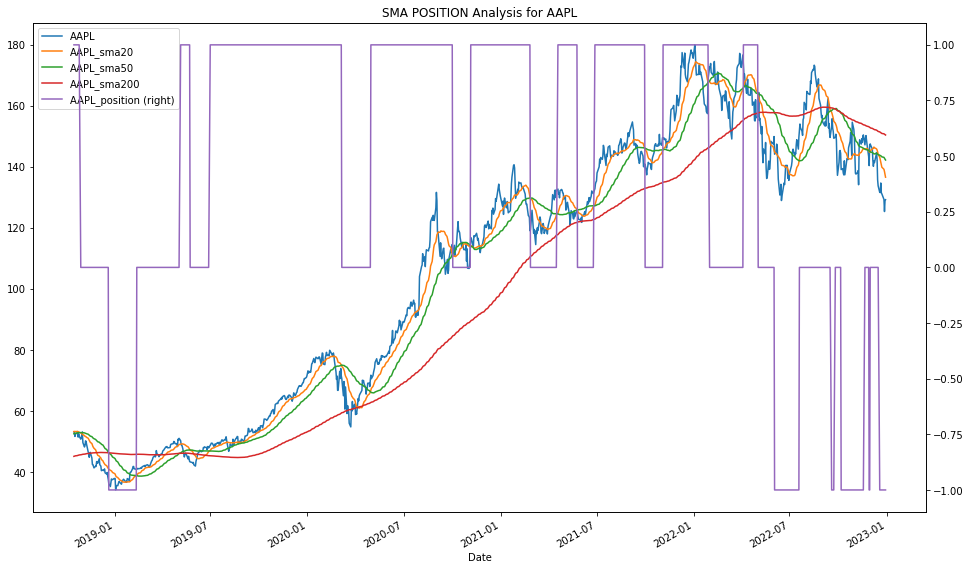

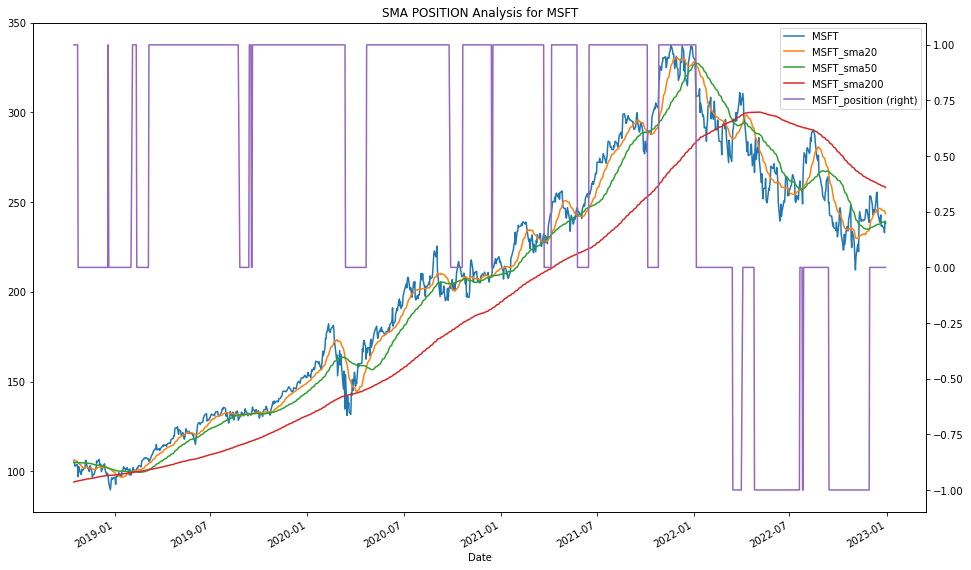

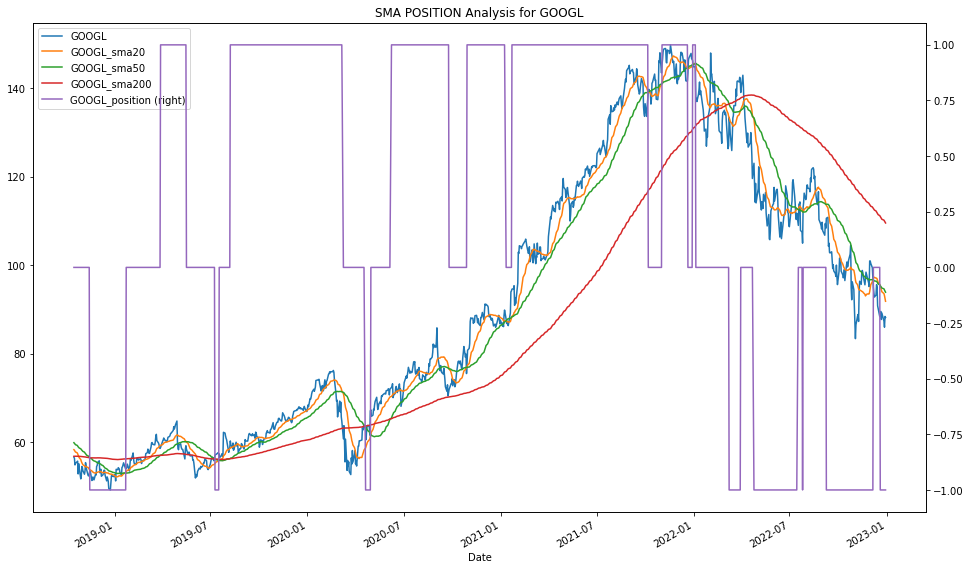

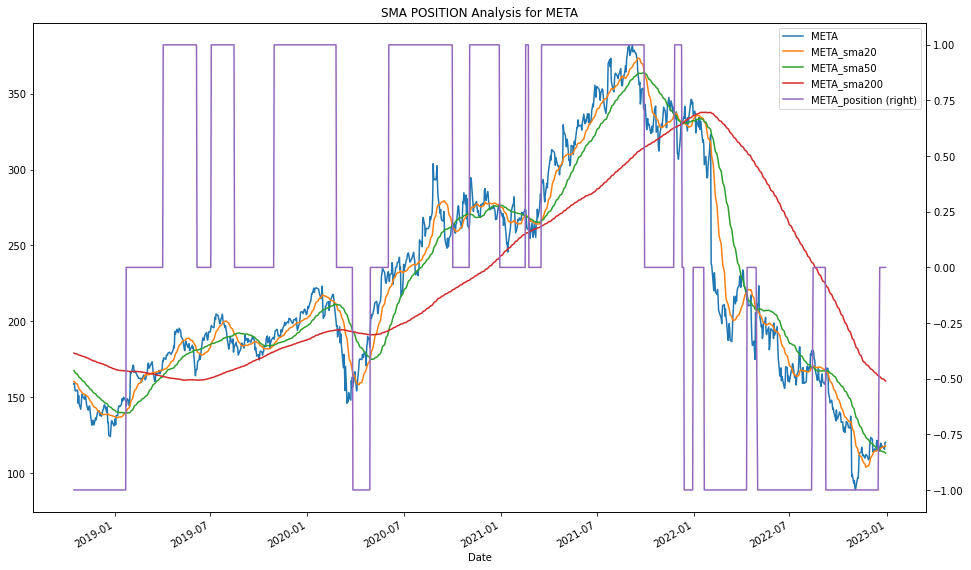

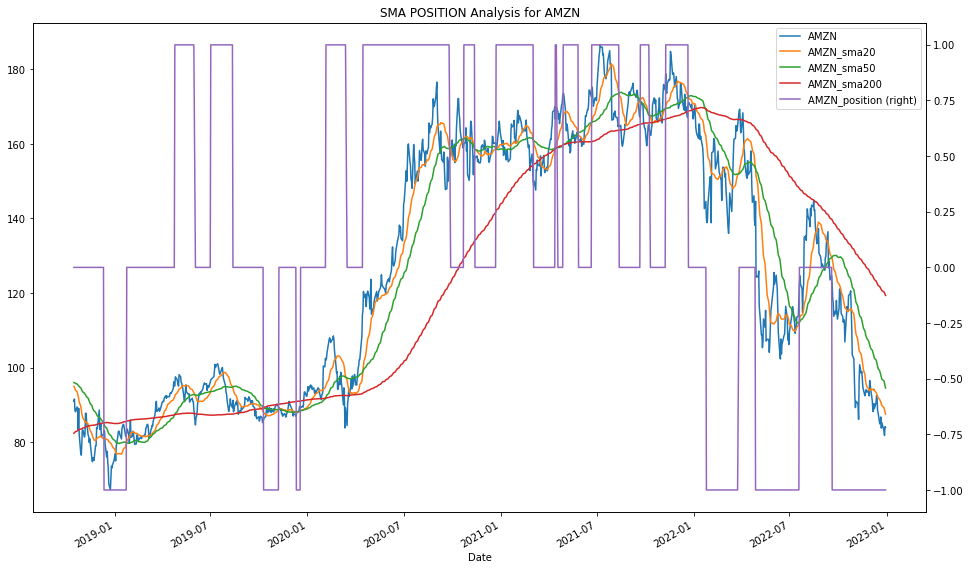

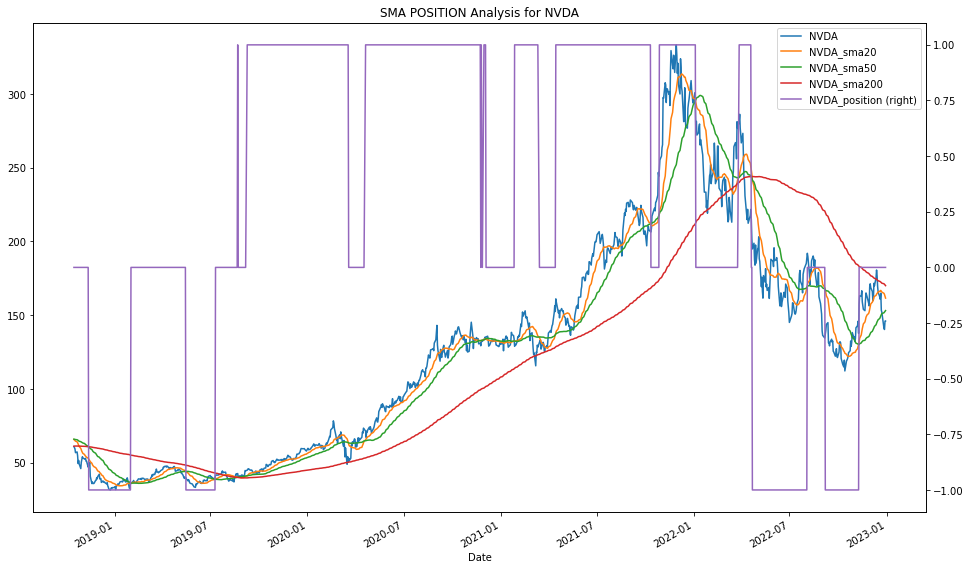

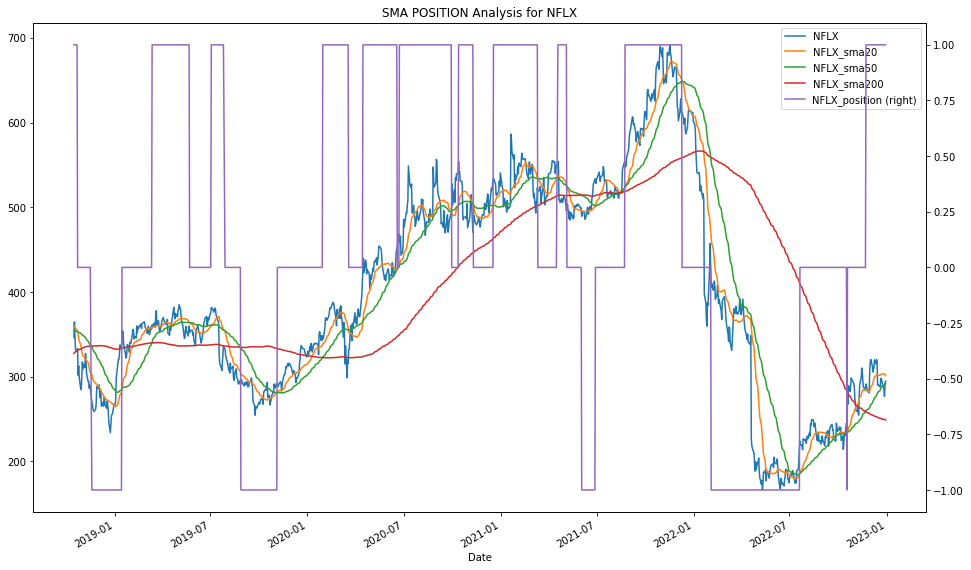

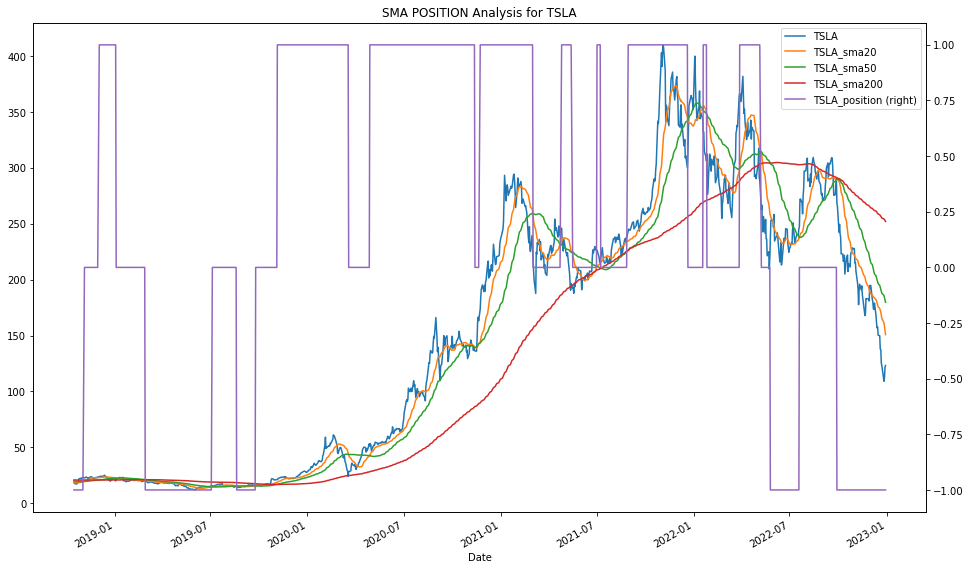

In [9]:
#시각화
for ticker in tickers:
    ax = sma_df[[ticker, ticker + '_sma20', ticker + '_sma50', ticker + '_sma200', ticker + '_position']].plot(figsize=(16, 10), secondary_y=(ticker + '_position'))
    ax.get_legend()
    ax.set_title(f'SMA POSITION Analysis for {ticker}')

# MACD STRATEGY

In [10]:
macd_df = pd.DataFrame()

< MACD 기본 포지션 진입,종료 로직>
- MACD 선이 MACD 시그널 선을 돌파하면 포지션 진입
- MACD 선이 MACD 시그널 선을 재돌파하면 포지션 종료

In [11]:
for ticker in tickers:
    #close 넣어주자 
    macd_df[ticker] = adj_price_df[ticker]

    # MACD 계산
    # 단기 이동 평균 기간 12일, 장기 이동 평균 기간 26일
    macd_df[ticker + "_macd"] = ta.trend.macd(adj_price_df[ticker], 12, 26)

    # MACD 시그널 계산
    # 신호선의 이동 평균 기간을 9일로 설정합니다.
    macd_df[ticker + "_macd_signal"] = ta.trend.macd_signal(adj_price_df[ticker], 12, 26, 9)

    # MACD와 시그널선의 차이
    macd_df[ticker + "_macd_diff"] = ta.trend.macd_diff(adj_price_df[ticker], 12, 26, 9)


In [12]:
macd_df.dropna(inplace=True)
macd_df

,AAPL,AAPL_macd,AAPL_macd_signal,AAPL_macd_diff,MSFT,MSFT_macd,MSFT_macd_signal,MSFT_macd_diff,GOOGL,GOOGL_macd,...,NVDA_macd_signal,NVDA_macd_diff,NFLX,NFLX_macd,NFLX_macd_signal,NFLX_macd_diff,TSLA,TSLA_macd,TSLA_macd_signal,TSLA_macd_diff
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-20,40.791584,0.149673,0.567563,-0.417890,87.131447,-0.620807,-0.437157,-0.183650,55.179501,0.573279,...,-1.079341,-0.323935,278.549988,-11.664931,-11.702805,0.037874,22.318001,0.108737,0.084682,0.024055
2018-02-21,40.606438,0.060578,0.466166,-0.405588,85.975555,-0.629587,-0.475643,-0.153944,55.687500,0.429856,...,-1.138954,-0.238453,281.040009,-11.948837,-11.752011,-0.196826,22.219999,0.089474,0.085641,0.003833
2018-02-22,40.945881,-0.036994,0.365534,-0.402528,86.201096,-0.647283,-0.509971,-0.137312,55.494999,0.327945,...,-1.182572,-0.174471,278.140015,-11.803763,-11.762362,-0.041402,23.077999,0.004917,0.069496,-0.064579
2018-02-23,41.657982,-0.169824,0.258462,-0.428286,88.390671,-0.828437,-0.573664,-0.254773,56.404499,0.171810,...,-1.226110,-0.174155,285.929993,-12.177008,-11.845291,-0.331717,23.469999,-0.092657,0.037065,-0.129723
2018-02-26,42.481651,-0.337663,0.139237,-0.476900,89.668701,-1.062878,-0.671507,-0.391371,57.185001,-0.014738,...,-1.267090,-0.163918,294.160004,-12.987193,-12.073671,-0.913521,23.827999,-0.196607,-0.009669,-0.186938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.127060,3.634480,2.533943,1.100537,237.112076,0.190022,-1.549909,1.739931,89.230003,2.062129,...,-4.408539,3.019979,294.959991,-1.990539,-4.998226,3.007686,123.150002,17.244768,13.664886,3.579883
2022-12-27,129.307236,3.899656,2.807086,1.092570,235.354080,0.752404,-1.089447,1.841851,87.389999,2.210383,...,-3.441761,3.867110,284.170013,-0.678229,-4.134226,3.455998,109.099998,19.072995,14.746507,4.326487
2022-12-28,125.339409,4.379496,3.121568,1.257928,232.940552,1.376974,-0.596162,1.973137,86.019997,2.410636,...,-2.371521,4.280959,276.880005,0.939203,-3.119540,4.058744,112.709999,20.000032,15.797212,4.202820


In [13]:
for ticker in tickers:
    # MACD 지표 계산
    macd_df[ticker + '_macd'] = ta.trend.macd(sma_df[ticker], 12, 26)
    macd_df[ticker + '_macd_signal'] = ta.trend.macd_signal(sma_df[ticker], 12, 26, 9)

    # 포지션 결정
    # MACD가 신호선 위에 있으면 매수 포지션(1), 아래에 있으면 매도 포지션(-1)
    macd_df[ticker + '_position'] = np.where(macd_df[ticker + '_macd'] > macd_df[ticker + '_macd_signal'], 1, np.where(macd_df[ticker + '_macd'] < macd_df[ticker + '_macd_signal'], -1, 0))

    # 포지션 유지 또는 종료 로직
    # 이전 포지션을 유지하기 위해 'ffill'을 사용
    macd_df[ticker + '_position'] = macd_df[ticker + '_position'].replace(to_replace=0, method='ffill')


In [14]:
macd_df

,AAPL,AAPL_macd,AAPL_macd_signal,AAPL_macd_diff,MSFT,MSFT_macd,MSFT_macd_signal,MSFT_macd_diff,GOOGL,GOOGL_macd,...,TSLA_macd_signal,TSLA_macd_diff,AAPL_position,MSFT_position,GOOGL_position,META_position,AMZN_position,NVDA_position,NFLX_position,TSLA_position
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-20,40.791584,NaN,NaN,-0.417890,87.131447,NaN,NaN,-0.183650,55.179501,NaN,...,NaN,0.024055,0,0,0,0,0,0,0,0
2018-02-21,40.606438,NaN,NaN,-0.405588,85.975555,NaN,NaN,-0.153944,55.687500,NaN,...,NaN,0.003833,0,0,0,0,0,0,0,0
2018-02-22,40.945881,NaN,NaN,-0.402528,86.201096,NaN,NaN,-0.137312,55.494999,NaN,...,NaN,-0.064579,0,0,0,0,0,0,0,0
2018-02-23,41.657982,NaN,NaN,-0.428286,88.390671,NaN,NaN,-0.254773,56.404499,NaN,...,NaN,-0.129723,0,0,0,0,0,0,0,0
2018-02-26,42.481651,NaN,NaN,-0.476900,89.668701,NaN,NaN,-0.391371,57.185001,NaN,...,NaN,-0.186938,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.127060,3.634480,2.533943,1.100537,237.112076,0.190022,-1.549909,1.739931,89.230003,2.062129,...,13.664886,3.579883,1,1,1,-1,1,1,1,1
2022-12-27,129.307236,3.899656,2.807086,1.092570,235.354080,0.752404,-1.089447,1.841851,87.389999,2.210383,...,14.746507,4.326487,1,1,1,-1,1,1,1,1
2022-12-28,125.339409,4.379496,3.121568,1.257928,232.940552,1.376974,-0.596162,1.973137,86.019997,2.410636,...,15.797212,4.202820,1,1,1,1,1,1,1,1


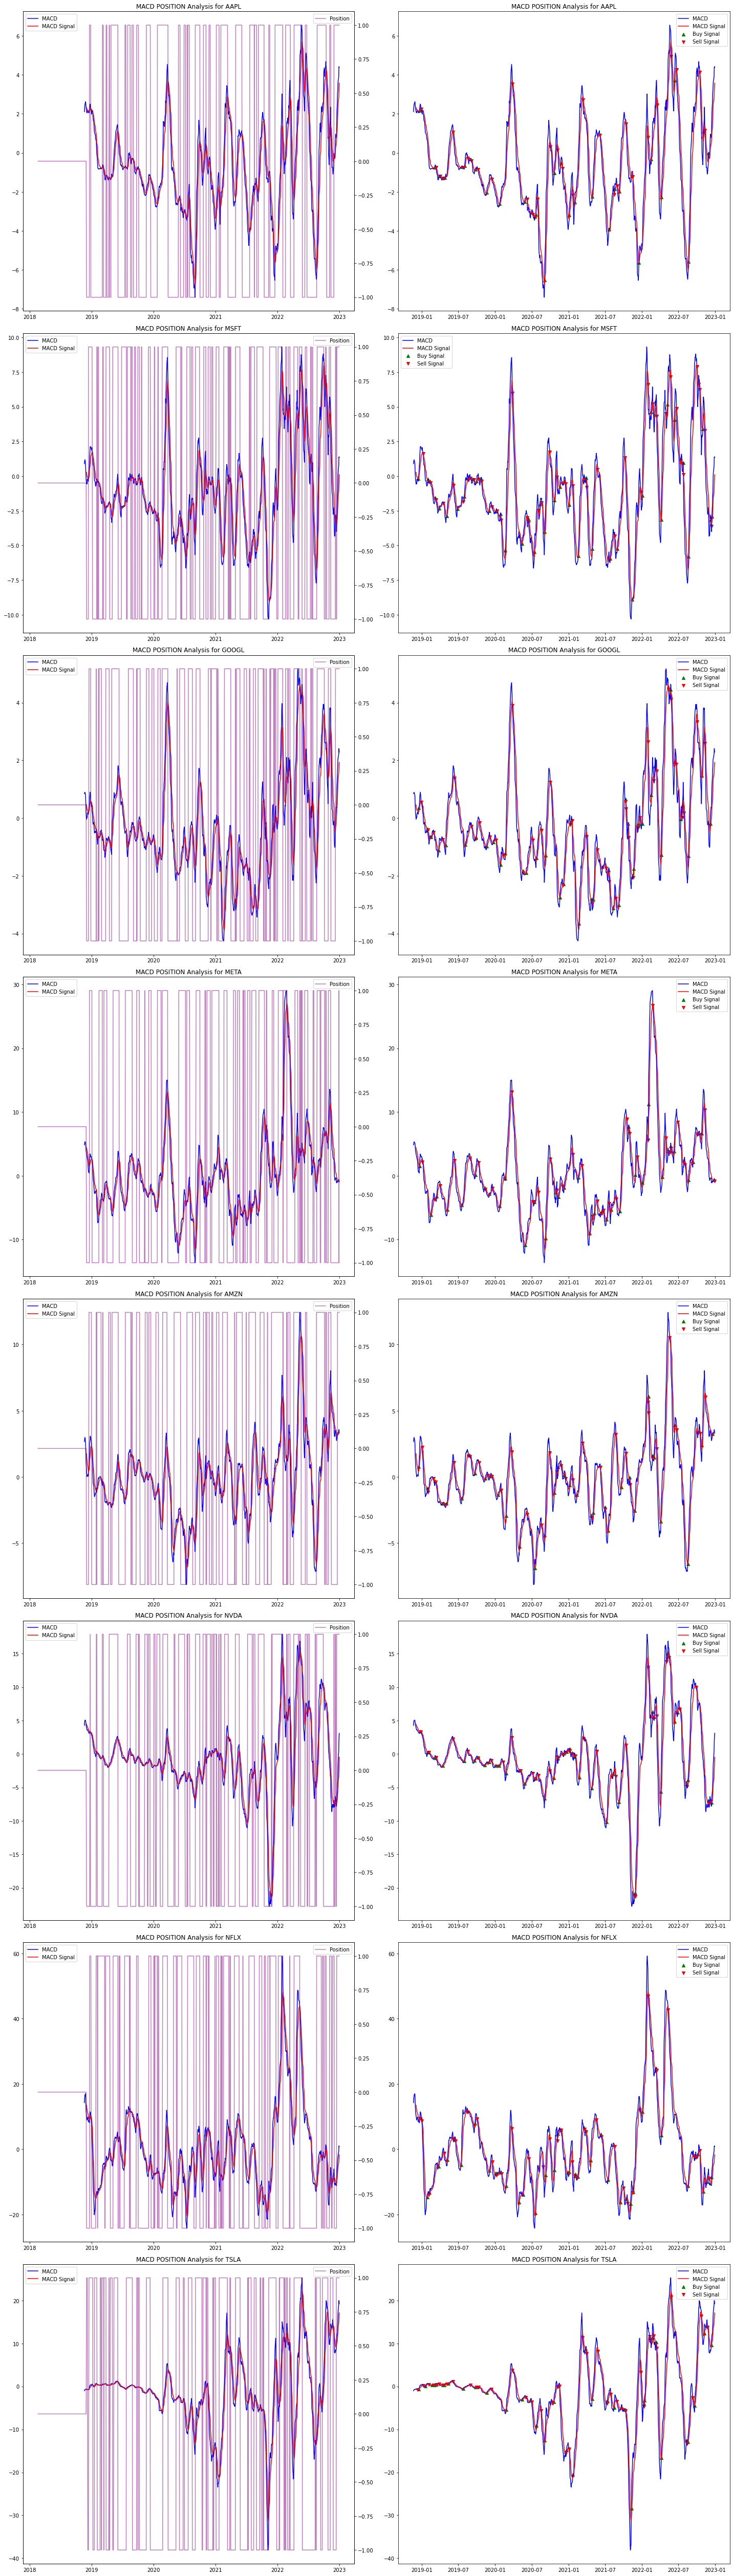

In [15]:
# 진입횟수가 잦아서 macd는 선그래프만으로 보면 가독성 떨어져서 마커 추가 
# 8행 2열 서브플롯 
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 70))

for i, ticker in enumerate(tickers):
    # 인덱스를 Numpy 배열로 변환
    index_array = macd_df.index.to_numpy()

    # 1열: 포지션 데이터를 포함한 MACD 선 그래프
    ax1 = axes[i, 0]
    ax1.plot(index_array, macd_df[ticker + '_macd'].values, label='MACD', color='blue')
    ax1.plot(index_array, macd_df[ticker + '_macd_signal'].values, label='MACD Signal', color='red')
    ax1_2 = ax1.twinx()
    ax1_2.plot(index_array, macd_df[ticker + '_position'].values, label='Position', color='purple', alpha=0.5)
    ax1.set_title(f'MACD POSITION Analysis for {ticker}')
    ax1.legend(loc='upper left')
    ax1_2.legend(loc='upper right')

    # 2열: 매수 및 매도 신호가 마커로 표시된 MACD 그래프
    ax2 = axes[i, 1]
    ax2.plot(index_array, macd_df[ticker + '_macd'].values, label='MACD', color='blue')
    ax2.plot(index_array, macd_df[ticker + '_macd_signal'].values, label='MACD Signal', color='red')
    buy_signals = (macd_df[ticker + '_macd'].values > macd_df[ticker + '_macd_signal'].values) & (np.roll(macd_df[ticker + '_macd'].values, 1) <= np.roll(macd_df[ticker + '_macd_signal'].values, 1))
    sell_signals = (macd_df[ticker + '_macd'].values < macd_df[ticker + '_macd_signal'].values) & (np.roll(macd_df[ticker + '_macd'].values, 1) >= np.roll(macd_df[ticker + '_macd_signal'].values, 1))
    ax2.scatter(index_array[buy_signals], macd_df[ticker + '_macd'][buy_signals].values, label='Buy Signal', marker='^', color='green', alpha=1)
    ax2.scatter(index_array[sell_signals], macd_df[ticker + '_macd'][sell_signals].values, label='Sell Signal', marker='v', color='red', alpha=1)
    ax2.set_title(f'MACD POSITION Analysis for {ticker}')
    ax2.legend()

plt.tight_layout()
plt.show()


# RSI STRATEGY

In [ ]:
rsi_df = pd.DataFrame()


<RSI 기본 포지션 종료 로직>
- 중립 구간 설정: 포지션을 열 때 사용된 임계값(ex: 30과 70)과는 다른, 중립적인 임계값을 설정하여 이 구간에 들어오면 포지션을 종료
- 예를 들어, 공매수 포지션(30 이하에서 시작)은 RSI가 5055 사이에 들어오면 종료하고, 공매도 포지션(70 이상에서 시작)은 RSI가 4550 사이에 들어오면 종료

In [ ]:
for ticker in tickers:
    # RSI 계산
    rsi = RSIIndicator(adj_price_df[ticker]).rsi()

    # 트레이딩 신호 생성
    long_signal = np.where(rsi <= 30, 1, 0)  # 과매도 구간에서 공매수 신호
    short_signal = np.where(rsi >= 70, -1, 0)  # 과매수 구간에서 공매도 신호

    # 포지션 종료 신호 생성
    exit_long_signal = np.where((rsi >= 50) & (rsi <= 55), -1, 0)  # 공매수 포지션 종료 신호
    exit_short_signal = np.where((rsi <= 50) & (rsi >= 45), 1, 0)  # 공매도 포지션 종료 신호

    # 최종 포지션 결정
    position = np.zeros_like(rsi)  # 포지션 배열 초기화
    for i in range(1, len(rsi)):
        if position[i-1] != 0:  # 이미 포지션에 있는 경우
            # 현재 포지션 유지 또는 종료 여부 확인
            if (position[i-1] == 1 and exit_long_signal[i] == -1) or (position[i-1] == -1 and exit_short_signal[i] == 1):
                position[i] = 0  # 포지션 종료
            else:
                position[i] = position[i-1]  # 기존 포지션 유지
        else:
            # 새로운 포지션 결정
            position[i] = long_signal[i] + short_signal[i]

    # 결과 저장
    rsi_df[ticker + '_RSI'] = rsi
    rsi_df[ticker + '_position'] = position



In [ ]:
rsi_df


In [ ]:
# 포지션 진입, 종료 시점과 해당 시점의 RSI 값을 출력(이상없이 위의 rsi 포지션 진입,종료 데이터 들어감을 알수 있음.)
# 포지션 변경 정보를 저장할 리스트 초기화
position_changes = []

# 모든 티커에 대해 포지션 변경 검사
for ticker in tickers:
    # 해당 티커의 RSI 및 포지션 데이터 가져오기
    ticker_rsi = rsi_df[ticker + '_RSI']
    ticker_position = rsi_df[ticker + '_position']

    # 이전 포지션 상태 초기화
    prev_position = 0

    # 각 날짜에 대해 반복
    for i in range(len(ticker_rsi)):
        current_position = ticker_position[i]
        # 포지션 변경이 발생한 경우
        if current_position != prev_position:
            position_changes.append({
                'Date': adj_price_df.index[i],
                'Ticker': ticker,
                'RSI': ticker_rsi[i],
                'Position_Change': current_position
            })
            prev_position = current_position

# 결과 출력
for change in position_changes:
    change_type = 'Entry' if change['Position_Change'] != 0 else 'Exit'
    print(f"Date: {change['Date']}, Ticker: {change['Ticker']}, RSI: {change['RSI']}, Change: {change_type}")


In [ ]:
# 각 종목별 RSI 컬럼에 대해 첫 번째 결측값이 없는 인덱스 찾기
first_valid_indices = {}
for ticker in tickers:
    first_valid_indices[ticker] = rsi_df[ticker + '_RSI'].first_valid_index()

first_valid_indices

In [ ]:
# 2018년 1월 22일 이후 데이터에서 결측값 확인.
missing_values_after_date = rsi_df.loc['2018-01-22':].isna().any()
missing_values_after_date


In [ ]:
# 결측값 제거(2017-12-31 ~2018-01-21까지 약 한 달 간의 데이터는 rsi 값 제공되지 않으므로 제거)
# rsi는 결측치 문제로 2018-01-22 ~ 2022-12-31까지의 데이터로 진행 ㄱㄱ
rsi_df.dropna(inplace=True)
rsi_df

In [ ]:
# 시각화
for ticker in tickers:
    ax = rsi_df[[ticker + '_RSI', ticker + '_position']].plot(figsize=(16, 6), secondary_y=(ticker + '_position'))
    ax.get_legend()


< RSI 심화 로직: 다이버전스 개념 적용>
- 주가 움직임 간의 반대 방향 움직임인 다이버전스를 감지하여 포지션 진입 시기를 결정
  (단순히 30,70 도달했다고 포지션 진입X, 다이버전스 발생 시에만 포지션 진입)
- 포지션 종료 시기는 공매도 시 rsi가 30에 진입하면 포지션 종료, 반대로 공매수 시에는 rsi가 70진입하면 포지션 종료로 변경
- 다이버전스는 RSI가 상승하면서 주가가 하락하거나, RSI가 하락하면서 주가가 상승할 때 나타남. 
- 주가가 하락하락하였음에도 이전 하락지점보다 RSI가 더 큰 경우 상승 추세로의 전환을 의미(상승 다이버전스)
- 반대로 주가 상승하였음에도 이전 상승지점보다 RSI가 더 작은 경우 하락 추세로의 전환을 의미(하락 다이버전스) 

In [ ]:
# # 위의 기본 로직 적용 시 결측치 제거했더니 ValueError: Length of values (1259) does not match length of index (1246)
# # 에러 발생. 
# # 원본 데이터프레임 백업 한거로 다시 불러오자 
# rsi_df_1=rsi_df_backup
# rsi_df_1 

In [ ]:
# data = pd.DataFrame()

In [ ]:
# for ticker in tickers:
#     # RSI 계산
#     rsi = RSIIndicator(adj_price_df[ticker]).rsi()
    
#     # 트레이딩 신호 생성
#     long_signal = np.where(rsi <= 30, 1, 0)  # 과매도 구간에서 매수 신호
#     short_signal = np.where(rsi >= 70, -1, 0)  # 과매수 구간에서 매도 신호

#     # 포지션 종료 신호 생성
#     exit_long_signal = np.where((rsi >= 25) & (rsi <= 30), -1, 0)  # 매수 포지션 종료 신호
#     exit_short_signal = np.where((rsi <= 75) & (rsi >= 70), 1, 0)  # 매도 포지션 종료 신호

#     # 다이버전스 검출 로직 추가
#     bullish_divergence_signal = np.where(
#         (rsi < 30) & (rsi > 25) & (rsi > rsi.shift(1)) & (adj_price_df[ticker] < adj_price_df[ticker].shift(1)),
#         1, 0
#     )  # 상승 다이버전스 신호
#     bearish_divergence_signal = np.where(
#         (rsi > 70) & (rsi < 75) & (rsi < rsi.shift(1)) & (adj_price_df[ticker] > adj_price_df[ticker].shift(1)),
#         -1, 0
#     )  # 하락 다이버전스 신호
    
#     # 최종 포지션 결정
#     position = long_signal + short_signal
#     position = np.where((position == 0) & (exit_long_signal == -1), 0, position)  # 매수 포지션 종료
#     position = np.where((position == 0) & (exit_short_signal == 1), 0, position)  # 매도 포지션 종료
#     position = position + bullish_divergence_signal + bearish_divergence_signal  # 다이버전스 신호 반영

#     # 결과 저장
#     rsi_df_1[ticker + '_RSI'] = rsi
#     rsi_df_1[ticker + '_position'] = position


In [ ]:
####

In [ ]:
# # 다이버전스 탐지 함수 
# def find_divergence(df):
#     # 결과를 저장할 리스트 초기화
#     peaks = []
#     troughs = []

#     # 다이버전스를 확인하기 위한 초기 값 설정
#     prev_high_price = prev_low_price = df['Close'][0]
#     prev_high_rsi = prev_low_rsi = df['RSI'][0]
#     prev_peak_date = prev_trough_date = df.index[0]

#     # 각 행마다 반복
#     for index, row in df.iterrows():
#         current_price = row['Close']
#         current_rsi = row['RSI']
#         current_date = index

#         # 고점 다이버전스를 찾는 경우
#         if current_price > prev_high_price and current_rsi < prev_high_rsi:
#             if prev_high_rsi >= 70:  # 과매수 구간 확인
#                 peaks.append({'Date': prev_peak_date, 'Price': prev_high_price, 'RSI': prev_high_rsi})

#         # 저점 다이버전스를 찾는 경우
#         elif current_price < prev_low_price and current_rsi > prev_low_rsi:
#             if prev_low_rsi =< 30:  # 과매도 구간 확인
#                 troughs.append({'Date': prev_trough_date, 'Price': prev_low_price, 'RSI': prev_low_rsi})

#         # 이전 고점과 저점을 현재 행의 값으로 갱신
#         if current_price > prev_high_price or current_rsi > prev_high_rsi:
#             prev_high_price = current_price
#             prev_high_rsi = current_rsi
#             prev_peak_date = current_date

#         if current_price < prev_low_price or current_rsi < prev_low_rsi:
#             prev_low_price = current_price
#             prev_low_rsi = current_rsi
#             prev_trough_date = current_date

#     # 결과 데이터프레임 생성
#     peaks_df = pd.DataFrame(peaks)
#     troughs_df = pd.DataFrame(troughs)
    
#     return peaks_df, troughs_df



In [ ]:
# print(peaks_df)


In [ ]:
# # 데이터프레임 초기화
# data = pd.DataFrame(index=adj_price_df.index)

# # 각 티커별로 RSI 및 포지션 계산 후 다이버전스 탐지
# for ticker in tickers:
#     # RSI 계산
#     df = pd.DataFrame()
#     df['Close'] = adj_price_df[ticker]
#     df['RSI'] = RSIIndicator(df['Close']).rsi()
    
#     # 초기 포지션 값 설정
#     df['position'] = 0  # 이 부분은 실제 전략에 따라 수정하세요

#     # 다이버전스 탐지
#     peaks_df, troughs_df = find_divergence(df)

#     # 다이버전스 신호를 포지션에 반영
#     for date in peaks_df['Date']:
#         df.loc[date, 'position'] = max(df.loc[date, 'position'], -1)
#     for date in troughs_df['Date']:
#         df.loc[date, 'position'] = min(df.loc[date, 'position'], 1)

#     # 결과 저장
#     data[ticker + '_RSI'] = df['RSI']
#     data[ticker + '_position'] = df['position']

In [ ]:
####

In [ ]:
# # 그러고 나서 다시 결측치 제거 ㄱㄱ
# rsi_df_1.dropna(inplace=True)
# rsi_df_1
# print(rsi_df_1.to_string())


In [ ]:
# # 그리고 다시 시각화
# for ticker in tickers:
#     ax = data[[ticker + '_RSI', ticker + '_position']].plot(figsize=(16, 6), secondary_y=(ticker + '_position'))
#     ax.get_legend()


In [ ]:
# # 기본로직 vs 심화로직 포지션 시각화 비교 (ㅅㅂ 왜 똑같이 나오냐)
# # 7행 2열의 서브플롯 생성
# fig, axes = plt.subplots(nrows=len(tickers), ncols=2, figsize=(12, 4 * len(tickers)))

# # 각 티커에 대해 rsi_df_1과 rsi_df의 그래프 생성
# for i, ticker in enumerate(tickers):
#     # rsi_df의 그래프 (첫 번째 열)ㅠ
#     ax1 = axes[i, 0]
#     ax1.plot(rsi_df.index.to_numpy(), rsi_df[ticker + '_RSI'].to_numpy(), label=ticker + '_RSI')
#     ax2 = ax1.twinx()
#     ax2.plot(rsi_df.index.to_numpy(), rsi_df[ticker + '_position'].to_numpy(), label=ticker + '_position', color='orange')
#     ax1.set_ylabel('RSI')
#     ax2.set_ylabel('Position')
#     ax1.set_title(f"{ticker} basic logic")
#     ax1.grid(True)
#     ax1.legend(loc='upper left')
#     ax2.legend(loc='upper right')

#     # data의 그래프 (두 번째 열)
#     ax1 = axes[i, 1]
#     ax1.plot(data.index.to_numpy(), data[ticker + '_RSI'].to_numpy(), label=ticker + '_RSI')
#     ax2 = ax1.twinx()
#     ax2.plot(data.index.to_numpy(), data[ticker + '_position'].to_numpy(), label=ticker + '_position', color='orange')
#     ax1.set_ylabel('RSI')
#     ax2.set_ylabel('Position')
#     ax1.set_title(f"{ticker} advanced logic")
#     ax1.grid(True)
#     ax1.legend(loc='upper left')
#     ax2.legend(loc='upper right')

# plt.tight_layout()
# plt.show()


In [ ]:
# is_same = rsi_df.equals(data)
# is_same

# Bollinger Band Strategy

In [ ]:
bb_df = pd.DataFrame()


In [ ]:
# 각 티커에 대한 볼린저 밴드 계산 및 컬럼 추가
for ticker in tickers:
    
    indicator_bb = ta.volatility.BollingerBands(close=adj_price_df[ticker], window=20, window_dev=2)

    # middle band(20일 이동 평균)
    bb_df[ticker + "_middle_band"] = indicator_bb.bollinger_mavg()

    # upper band
    bb_df[ticker + "_upper_band"] = indicator_bb.bollinger_hband()

    # lower band
    bb_df[ticker + "_lower_band"] = indicator_bb.bollinger_lband()


In [ ]:
# 포지션 데이터 입력 및 컬럼 추가
for ticker in tickers:
    # 볼린저 밴드 계산
    indicator_bb = ta.volatility.BollingerBands(close=adj_price_df[ticker], window=20, window_dev=2)

    # 포지션 계산
    # 하단 밴드 이탈 시 매수 포지션 (1)
    # 상단 밴드 이탈 시 매도 포지션 (-1)
    # 중간 밴드 도달 시 포지션 종료 (0)
    bb_df[ticker + '_position'] = 0
    bb_df.loc[adj_price_df[ticker] < indicator_bb.bollinger_lband(), ticker + '_position'] = 1
    bb_df.loc[adj_price_df[ticker] > indicator_bb.bollinger_hband(), ticker + '_position'] = -1
    bb_df.loc[adj_price_df[ticker].between(indicator_bb.bollinger_lband(), indicator_bb.bollinger_hband()), ticker + '_position'] = 0


In [ ]:
# 7행 2열로 그래프 나누기 #볼벤도 가독성 떨어져 옆에 마커로 표시된 그래프 추가 
fig, axes = plt.subplots(8, 2, figsize=(20, 70))

for i, ticker in enumerate(tickers):
    # 인덱스를 Numpy 배열로 변환
    index_array = bb_df.index.to_numpy()

    # 1열: 포지션 데이터를 포함한 볼린저 밴드 그래프
    ax1 = axes[i, 0]
    ax1.plot(index_array, adj_price_df[ticker].values, label='Price', color='blue')
    ax1.plot(index_array, bb_df[ticker + '_upper_band'].values, label='Upper Band', color='red', linestyle='--')
    ax1.plot(index_array, bb_df[ticker + '_middle_band'].values, label='Middle Band', color='green')
    ax1.plot(index_array, bb_df[ticker + '_lower_band'].values, label='Lower Band', color='red', linestyle='--')
    ax1_2 = ax1.twinx()
    ax1_2.plot(index_array, bb_df[ticker + '_position'].values, label='Position', color='purple', alpha=0.5)
    ax1.set_title(f'Bollinger Band POSITION Analysis for {ticker}')
    ax1.legend(loc='upper left')
    ax1_2.legend(loc='upper right')

    # 2열: 매수 및 매도 신호가 마커로 표시된 볼린저 밴드 그래프
    ax2 = axes[i, 1]
    ax2.plot(index_array, adj_price_df[ticker].values, label='Price', color='blue')
    ax2.plot(index_array, bb_df[ticker + '_upper_band'].values, label='Upper Band', color='red', linestyle='--')
    ax2.plot(index_array, bb_df[ticker + '_middle_band'].values, label='Middle Band', color='green')
    ax2.plot(index_array, bb_df[ticker + '_lower_band'].values, label='Lower Band', color='red', linestyle='--')
    buy_signals = (adj_price_df[ticker].values < bb_df[ticker + '_lower_band'].values) & (np.roll(adj_price_df[ticker].values, 1) >= np.roll(bb_df[ticker + '_lower_band'].values, 1))
    sell_signals = (adj_price_df[ticker].values > bb_df[ticker + '_upper_band'].values) & (np.roll(adj_price_df[ticker].values, 1) <= np.roll(bb_df[ticker + '_upper_band'].values, 1))
    ax2.scatter(index_array[buy_signals], adj_price_df[ticker][buy_signals].values, label='Buy Signal', marker='^', color='green', alpha=1)
    ax2.scatter(index_array[sell_signals], adj_price_df[ticker][sell_signals].values, label='Sell Signal', marker='v', color='red', alpha=1)
    ax2_2 = ax2.twinx()
    
    ax2.set_title(f'Bollinger Band POSITION Analysis for {ticker}')
    ax2.legend()
    ax2_2.legend()

plt.tight_layout()
plt.show()



# Performance Evaluation

- 1) cumulative returns
- 2) 지표별 전략 vs bnh_ratio	
- 3) sharpe_ratio with cagr & volatility
- 4) max_drawdown	
- 5) calmar_ratio

### 1) cumulative Returns(누적 수익률)

- SMA

In [ ]:

for ticker in tickers:
    # 일일 백분율 변화 계산
    sma_df[ticker+'_ret'] = sma_df[ticker].pct_change()
    # 계산된 수익률을 전날의 포지션 값에 따라 조정
    sma_df[ticker+'_ret'] = sma_df[ticker+'_ret'] * sma_df[ticker + '_position'].shift(1)

In [ ]:
#sma전략 누적수익률 시각화 
ax = (1 + sma_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod().plot(figsize=(14, 10))
ax.get_legend()

- MACD

In [ ]:
for ticker in tickers:
    # 일일 백분율 변화 계산
    macd_df[ticker+'_ret'] = macd_df[ticker].pct_change()
    # 계산된 수익률을 전날의 포지션 값에 따라 조정
    macd_df[ticker+'_ret'] = macd_df[ticker+'_ret'] * macd_df[ticker + '_position'].shift(1)

In [ ]:
ax = (1 + macd_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod().plot(figsize=(14, 10))
ax.get_legend()

- RSI

In [ ]:
#rsi_df에 종가 데이터 빠져있어서 추가 
combined_df = pd.merge(rsi_df, adj_price_df, on='Date')

In [ ]:
#rsi for performance evaluation
for ticker in tickers:
    # 일일 백분율 변화를 계산
    rsi_df[ticker+'_ret'] = combined_df[ticker].pct_change()

    # 계산된 수익률을 전날의 포지션 값에 따라 조정
    rsi_df[ticker+'_ret'] = rsi_df[ticker+'_ret'] * rsi_df[ticker + '_position'].shift(1)


In [ ]:
#rsi전략 성과 시각화 
ax = (1 + rsi_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod().plot(figsize=(14, 10))
ax.get_legend()

- Bollinger Band

In [ ]:
combined_df1 = pd.merge(bb_df, adj_price_df, on='Date')

In [ ]:
for ticker in tickers:
    # 일일 백분율 변화 계산
    bb_df[ticker+'_ret'] = combined_df1[ticker].pct_change()
    # 계산된 수익률을 전날의 포지션 값에 따라 조정
    bb_df[ticker+'_ret'] = bb_df[ticker+'_ret'] * bb_df[ticker + '_position'].shift(1)

In [ ]:
#bb전략 성과 시각화 
ax = (1 + bb_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod().plot(figsize=(14, 10))
ax.get_legend()

In [ ]:
#4개 지표별 누적 수익률 그래프 서브 플롯으로 비교 

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# SMA 
axs[0, 0].plot((1 + sma_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod())
axs[0, 0].set_title('SMA Strategy')
axs[0, 0].legend(sma_df.columns)

# MACD 
axs[0, 1].plot((1 + macd_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod())
axs[0, 1].set_title('MACD Strategy')
axs[0, 1].legend(macd_df.columns)

# RSI 
axs[1, 0].plot((1 + rsi_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod())
axs[1, 0].set_title('RSI Strategy')
axs[1, 0].legend(rsi_df.columns)

# Bollinger Band 
axs[1, 1].plot((1 + bb_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod())
axs[1, 1].set_title('Bollinger Band Strategy')
axs[1, 1].legend(bb_df.columns)

plt.tight_layout()
plt.show()


- 4개 지표 전략 누적수익률 한 눈에  비교 

In [ ]:
# 날짜 범위 설정
start_date = '2018-01-01'
end_date = '2022-12-31'

# 각 전략별 데이터프레임에서 해당 날짜 범위에 맞게 데이터 필터링
sma_df_filtered = sma_df.loc[start_date:end_date]
macd_df_filtered = macd_df.loc[start_date:end_date]
rsi_df_filtered = rsi_df.loc[start_date:end_date]
bb_df_filtered = bb_df.loc[start_date:end_date]

# 필터링된 데이터를 사용하여 각 전략별 평균 일일 수익률 계산
sma_mean_ret = sma_df_filtered.mean(axis=1)
macd_mean_ret = macd_df_filtered.mean(axis=1)
rsi_mean_ret = rsi_df_filtered.mean(axis=1)
bb_mean_ret = bb_df_filtered.mean(axis=1)

# 각 전략별 평균 누적 수익률 계산
sma_cum_ret = (1 + sma_mean_ret).cumprod()
macd_cum_ret = (1 + macd_mean_ret).cumprod()
rsi_cum_ret = (1 + rsi_mean_ret).cumprod()
bb_cum_ret = (1 + bb_mean_ret).cumprod()

# 시각화
plt.figure(figsize=(14, 10))
plt.plot(sma_cum_ret, label='SMA Strategy')
plt.plot(macd_cum_ret, label='MACD Strategy')
plt.plot(rsi_cum_ret, label='RSI Strategy')
plt.plot(bb_cum_ret, label='Bollinger Bands Strategy')

plt.title('Average Cumulative Returns of Four Trading Strategies (2018-2022)')
plt.xlabel('Date')
plt.ylabel('Average Cumulative Return')
plt.legend()
plt.show()


### 지표 별 전략 vs Buy & Hold Strategy

In [ ]:
def bnh_ratio(DF, ticker):
    "calculate relative performance of the strategy versus buy & hold strategy"
    df = DF.copy()
    df['return'] = df[ticker].pct_change()
    df['cum_return'] = (1 + df[ticker+'_ret']).cumprod()
    df['cum_return_bnh'] = (1 + df['return']).cumprod()
    return df.iloc[-1]['cum_return'] / df.iloc[-1]['cum_return_bnh']

- sma

In [ ]:
# sma 전략성과
for ticker in tickers:
    print("SMA performance relative to B&H strategy on {} is {}".format(ticker, bnh_ratio(sma_df, ticker)))

In [ ]:
#sma vs bnh 시각화 

performance_ratios = {}

for ticker in tickers:
    performance_ratios[ticker] = bnh_ratio(sma_df, ticker)

ratios = list(performance_ratios.values())

# 성능 비율 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color='blue')

# 1을 기준으로 선을 그려 SMA 전략이 B&H 전략보다 더 나은지 여부 표시
plt.axhline(y=1, color='red', linestyle='--')


for bar, ratio in zip(bars, ratios):
    if ratio > 1:
        bar.set_color('green')

plt.title('SMA Strategy Performance Relative to B&H Strategy')
plt.xlabel('Ticker')
plt.ylabel('Performance Ratio')

- macd

In [ ]:
# macd 전략성과
for ticker in tickers:
    print("MACD performance relative to B&H strategy on {} is {}".format(ticker, bnh_ratio(macd_df, ticker)))

In [ ]:
# macd vs bnh 시각화 
performance_ratios_1 = {}

for ticker in tickers:
    performance_ratios_1[ticker] = bnh_ratio(macd_df, ticker)

ratios = list(performance_ratios_1.values())


# 성능 비율 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color='blue', label='MACD / B&H')

# 1을 기준으로 선을 그려 macd 전략이 B&H 전략보다 더 나은지 여부를 표시
plt.axhline(y=1, color='red', linestyle='--', label='B&H Baseline')

# 성능 비율이 1보다 큰 경우, 해당 바의 색상을 변경
for bar, ratio in zip(bars, ratios):
    if ratio > 1:
        bar.set_color('green')

plt.title('MACD Strategy Performance Relative to B&H Strategy')
plt.xlabel('Ticker')
plt.ylabel('Performance Ratio')


plt.legend()


plt.show()


- rsi

In [ ]:
#rsi_df에 종가 데이터 빠져있어서 추가 
combined_df = pd.merge(rsi_df, adj_price_df, on='Date')


In [ ]:
#rsi 전략성과 
for ticker in tickers:
    print("RSI performance relative to B&H strategy on {} is {}".format(ticker, bnh_ratio(combined_df, ticker)))

In [ ]:
# rsi vs bnh 시각화 
performance_ratios_2 = {}

for ticker in tickers:
    performance_ratios_2[ticker] = bnh_ratio(combined_df, ticker)

ratios = list(performance_ratios_2.values())


# 성능 비율 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color='blue', label='RSI / B&H')

# 1을 기준으로 선을 그려 rsi 전략이 B&H 전략보다 더 나은지 여부를 표시
plt.axhline(y=1, color='red', linestyle='--', label='B&H Baseline')

# 성능 비율이 1보다 큰 경우, 해당 바의 색상을 변경
for bar, ratio in zip(bars, ratios):
    if ratio > 1:
        bar.set_color('green')

plt.title('RSI Strategy Performance Relative to B&H Strategy')
plt.xlabel('Ticker')
plt.ylabel('Performance Ratio')


plt.legend()


plt.show()

- bollinger bands

In [ ]:
#bb_df에 종가 데이터 빠져있어서 추가 
combined_df1 = pd.merge(bb_df, adj_price_df, on='Date')


In [ ]:
#bollinger bands 전략성과 
for ticker in tickers:
    print("BOLLINGER BANDS performance relative to B&H strategy on {} is {}".format(ticker, bnh_ratio(combined_df1, ticker)))

In [ ]:
# bollinger bands vs bnh 시각화 
performance_ratios_3 = {}

for ticker in tickers:
    performance_ratios_3[ticker] = bnh_ratio(combined_df1, ticker)

ratios = list(performance_ratios_3.values())


# 성능 비율 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color='blue', label='RSI / B&H')

# 1을 기준으로 선을 그려 rsi 전략이 B&H 전략보다 더 나은지 여부를 표시
plt.axhline(y=1, color='red', linestyle='--', label='B&H Baseline')

# 성능 비율이 1보다 큰 경우, 해당 바의 색상을 변경
for bar, ratio in zip(bars, ratios):
    if ratio > 1:
        bar.set_color('green')

plt.title('BOLLINGER BANDS Strategy Performance Relative to B&H Strategy')
plt.xlabel('Ticker')
plt.ylabel('Performance Ratio')


plt.legend()


plt.show()

In [ ]:
# 4개 지표 별 전략 vs Buy & Hold Strategy 서브플롯 


ratios = list(performance_ratios.values())
tickers = list(performance_ratios.keys())
ratios = list(performance_ratios_1.values())
tickers = list(performance_ratios_1.keys())
ratios = list(performance_ratios_2.values())
tickers = list(performance_ratios_2.keys())
ratios = list(performance_ratios_3.values())
tickers = list(performance_ratios_3.keys())

# 2행 2열 
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

def plot_bar_chart(ax, performance_ratios, title, label):
    ratios = list(performance_ratios.values())
    bars = ax.bar(tickers, ratios, color='blue', label=label)
    ax.axhline(y=1, color='red', linestyle='--', label='B&H Baseline')
    for bar, ratio in zip(bars, ratios):
        if ratio > 1:
            bar.set_color('green')
    ax.set_title(title)
    ax.set_xlabel('Ticker')
    ax.set_ylabel('Performance Ratio')
    ax.legend()


plot_bar_chart(axs[0, 0], performance_ratios, 'SMA VS B&H ', 'SMA / B&H')

plot_bar_chart(axs[0, 1], performance_ratios_1, 'MACD VS B&H ', 'MACD / B&H')

plot_bar_chart(axs[1, 0], performance_ratios_2, 'RSI VS B&H ', 'RSI / B&H')

plot_bar_chart(axs[1, 1], performance_ratios_3, 'BOLLINGER BANDS VS B&H ', 'BOLLINGER BANDS / B&H')


- 4개 지표 전략 vs bnh 한 눈에 비교

In [ ]:
# 지표 별 성능 비율의 평균 계산

average_performance = sum(performance_ratios.values()) / len(performance_ratios)
print("Average Performance of SMA Strategy: ", average_performance)

average_performance1 = sum(performance_ratios_1.values()) / len(performance_ratios_1)
print("Average Performance of MACD Strategy: ", average_performance1)

average_performance2 = sum(performance_ratios_2.values()) / len(performance_ratios_2)
print("Average Performance of RSI Strategy: ", average_performance2)

average_performance3 = sum(performance_ratios_3.values()) / len(performance_ratios_3)
print("Average Performance of Bollinger Bands Strategy: ", average_performance3)

In [ ]:
average_performances_0 = {
    'SMA': average_performance,
    'MACD': average_performance1,
    'RSI': average_performance2,
    'Bollinger Bands': average_performance3
}

# 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(average_performances_0.keys(), average_performances_0.values(), color=['blue', 'green', 'red', 'purple'])

plt.title('Average Performance of Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Average Performance Ratio')

plt.show()


### Sharpe Ratio

In [ ]:
# 시간 지남에 따른 투자 성장률 
def CAGR(DF, ticker):
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df = DF.copy()
    df['return'] = df[ticker].pct_change()
    df['cum_return'] = (1 + df[ticker+'_ret']).cumprod()
    n = len(df) / 250
    CAGR = (df.iloc[-1]['cum_return']) ** (1 / n) - 1
    return CAGR

In [ ]:
#sma cagr
for ticker in tickers:
    print("CAGR of SMA strategy on {} = {}".format(ticker, CAGR(sma_df, ticker)))

In [ ]:
#sma cagr 시각화
cagr_ratios = {}

for ticker in tickers:
    cagr_ratios[ticker] = CAGR(sma_df, ticker)

ratios = list(cagr_ratios.values())

colors = []
normalized_ratios = [(x - min(ratios)) / (max(ratios) - min(ratios)) for x in ratios]
cmap = plt.get_cmap("coolwarm")

for ratio in normalized_ratios:
    color = cmap(ratio)
    colors.append(color)

plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color=colors)
plt.xlabel('Companies')
plt.ylabel('CAGR')
plt.title('Comparison of CAGR Values for Different Companies Using SMA Strategy')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')


sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', label='CAGR Value')

plt.show()

In [ ]:
#macd cagr
for ticker in tickers:
    print("CAGR of MACD strategy on {} = {}".format(ticker, CAGR(macd_df, ticker)))

In [ ]:
#macd cagr 시각화
cagr_ratios1 = {}

for ticker in tickers:
    cagr_ratios1[ticker] = CAGR(macd_df, ticker)

ratios = list(cagr_ratios1.values())

colors = []
normalized_ratios = [(x - min(ratios)) / (max(ratios) - min(ratios)) for x in ratios]
cmap = plt.get_cmap("coolwarm")

for ratio in normalized_ratios:
    color = cmap(ratio)
    colors.append(color)

plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color=colors)
plt.xlabel('Companies')
plt.ylabel('CAGR')
plt.title('Comparison of CAGR Values for Different Companies Using MACD Strategy')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')

# Add color legend
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', label='CAGR Value')

plt.show()

In [ ]:
#rsi cagr
for ticker in tickers:
    print("CAGR of RSI strategy on {} = {}".format(ticker, CAGR(combined_df, ticker)))

In [ ]:
#rsi cagr 시각화 
cagr_ratios2 = {}

for ticker in tickers:
    cagr_ratios2[ticker] = CAGR(combined_df, ticker)

ratios = list(cagr_ratios2.values())

colors = []
normalized_ratios = [(x - min(ratios)) / (max(ratios) - min(ratios)) for x in ratios]
cmap = plt.get_cmap("coolwarm")

for ratio in normalized_ratios:
    color = cmap(ratio)
    colors.append(color)

plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color=colors)
plt.xlabel('Companies')
plt.ylabel('CAGR')
plt.title('Comparison of CAGR Values for Different Companies Using RSI Strategy')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', label='CAGR Value')

plt.show()

In [ ]:
#bollinger bands cagr 
for ticker in tickers:
    print("CAGR of RSI strategy on {} = {}".format(ticker, CAGR(combined_df1, ticker)))

In [ ]:
#bollinger bands 시각화 
cagr_ratios3 = {}

for ticker in tickers:
    cagr_ratios3[ticker] = CAGR(combined_df1, ticker)

ratios = list(cagr_ratios3.values())

colors = []
normalized_ratios = [(x - min(ratios)) / (max(ratios) - min(ratios)) for x in ratios]
cmap = plt.get_cmap("coolwarm")

for ratio in normalized_ratios:
    color = cmap(ratio)
    colors.append(color)

plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color=colors)
plt.xlabel('Companies')
plt.ylabel('CAGR')
plt.title('Comparison of CAGR Values for Different Companies Using BB Strategy')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')


sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', label='CAGR Value')

plt.show()

- 4개 지표 전략 cagr 한 눈에 비교

In [ ]:
average_cagr = sum(cagr_ratios.values()) / len(cagr_ratios)
print("Average CAGR of SMA Strategy: ", average_cagr)

average_cagr1 = sum(cagr_ratios1.values()) / len(cagr_ratios1)
print("Average CAGR of MACD Strategy: ", average_cagr1)

average_cagr2 = sum(cagr_ratios2.values()) / len(cagr_ratios2)
print("Average CAGR of RSI Strategy: ", average_cagr2)

average_cagr3 = sum(cagr_ratios3.values()) / len(cagr_ratios3)
print("Average CAGR of Bollinger Bands Strategy: ", average_cagr3)

In [ ]:
average_cagr_0 = {
    'SMA': average_cagr,
    'MACD': average_cagr1,
    'RSI': average_cagr2,
    'Bollinger Bands': average_cagr3
}

# 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(average_cagr_0.keys(), average_performances_0.values(), color=['blue', 'green', 'red', 'purple'])

plt.title('Average CAGR of Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Average Performance Ratio')

plt.show()

In [ ]:
#투자 수익의 변동성 or 위험성
def volatility(DF, ticker):
    "function to calculate annualized Volatility of a trading strategy"
    df = DF.copy()
    vol = df[ticker+'_ret'].std() * np.sqrt(250)
    return vol

In [ ]:
#sma volatility
for ticker in tickers:
    print("Volatility for SMA strategy on {} = {}".format(ticker, volatility(sma_df, ticker)))

In [ ]:
#sma voltility 시각화 
volatility_ratios = {}

for ticker in tickers:
    volatility_ratios[ticker] = volatility(sma_df, ticker)

ratios = list(volatility_ratios.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='skyblue')
plt.xlabel('Companies')
plt.ylabel('Volatility')
plt.title('Comparison of Volatility for MACD Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

In [ ]:
#macd volatility
for ticker in tickers:
    print("Volatility for MACD strategy on {} = {}".format(ticker, volatility(macd_df, ticker)))

In [ ]:
#macd volatility 시각화

volatility_ratios1 = {}

for ticker in tickers:
    volatility_ratios1[ticker] = volatility(macd_df, ticker)

ratios = list(volatility_ratios1.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='blue')
plt.xlabel('Companies')
plt.ylabel('Volatility')
plt.title('Comparison of Volatility for MACD Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

In [ ]:
#rsi volatility
for ticker in tickers:
    print("Volatility for RSI strategy on {} = {}".format(ticker, volatility(combined_df, ticker)))

In [ ]:
#rsi volatility 시각화

volatility_ratios2 = {}

for ticker in tickers:
    volatility_ratios2[ticker] = volatility(combined_df, ticker)

ratios = list(volatility_ratios2.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='green')
plt.xlabel('Companies')
plt.ylabel('Volatility')
plt.title('Comparison of Volatility for RSI Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

In [ ]:
# bb volatility 
for ticker in tickers:
    print("Volatility for BOLLINGER BANDS strategy on {} = {}".format(ticker, volatility(combined_df1, ticker)))

In [ ]:
#bb volatility 시각화

volatility_ratios3 = {}

for ticker in tickers:
    volatility_ratios3[ticker] = volatility(combined_df1, ticker)

ratios = list(volatility_ratios3.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='red')
plt.xlabel('Companies')
plt.ylabel('Volatility')
plt.title('Comparison of Volatility for RSI Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

- 4개 지표 전략 volatility 한 눈에 비교

In [ ]:
average_volatility = sum(volatility_ratios.values()) / len(volatility_ratios)
print("Average VOLATILITY of SMA Strategy: ", average_volatility)

average_volatility1 = sum(volatility_ratios1.values()) / len(volatility_ratios1)
print("Average VOLATILITY of MACD Strategy: ", average_volatility1)

average_volatility2 = sum(volatility_ratios2.values()) / len(volatility_ratios2)
print("Average VOLATILITY of RSI Strategy: ", average_volatility2)

average_volatility3 = sum(volatility_ratios3.values()) / len(volatility_ratios3)
print("Average VOLATILITY of Bollinger Bands Strategy: ", average_volatility3)

In [ ]:
average_volatility_0 = {
    'SMA': average_volatility,
    'MACD': average_volatility1,
    'RSI': average_volatility2,
    'Bollinger Bands': average_volatility3
}

# 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(average_cagr_0.keys(), average_volatility_0.values(), color=['skyblue', 'blue', 'green', 'red'])

plt.title('Average VOLATILITY of Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Average Performance Ratio')

plt.show()

In [ ]:
# 투자전략의 위험 대비 수익률 with cagr and volatility 
def sharpe(DF, ticker, rf):
    "function to calculate Sharpe Ratio of a trading strategy"
    df = DF.copy()
    return (CAGR(df, ticker) - rf) / volatility(df, ticker)

In [ ]:
# SMA SHARPE RATIO
for ticker in tickers:
    print("Sharpe ratio for SMA strategy on {} = {}".format(ticker, sharpe(sma_df, ticker, 0.04)))

In [ ]:
#sma sharpe ratio 시각화
sharpe_ratios = {}

for ticker in tickers:
    sharpe_ratios[ticker] = sharpe(sma_df, ticker,0.04)

ratios = list(sharpe_ratios.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='skyblue')
plt.xlabel('Companies')
plt.ylabel('Sharpe ratio')
plt.title('Comparison of Sharpe ratio for SMA Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

In [ ]:
# MACD SHARPE RATIO
for ticker in tickers:
    print("Sharpe ratio for MACD strategy on {} = {}".format(ticker, sharpe(macd_df, ticker, 0.04)))

In [ ]:
#macd sharpe ratio 시각화
sharpe_ratios1 = {}

for ticker in tickers:
    sharpe_ratios1[ticker] = sharpe(macd_df, ticker,0.04)

ratios = list(sharpe_ratios1.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='blue')
plt.xlabel('Companies')
plt.ylabel('Sharpe ratio')
plt.title('Comparison of Sharpe ratio for MACD Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

In [ ]:
# RSI SHARPE RATIO
for ticker in tickers:
    print("Sharpe ratio for RSI strategy on {} = {}".format(ticker, sharpe(combined_df, ticker, 0.04)))

In [ ]:
#rsi sharpe ratio 시각화
sharpe_ratios2 = {}

for ticker in tickers:
    sharpe_ratios2[ticker] = sharpe(combined_df, ticker,0.04)

ratios = list(sharpe_ratios2.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='GREEN')
plt.xlabel('Companies')
plt.ylabel('Sharpe ratio')
plt.title('Comparison of Sharpe ratio for RSI Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

In [ ]:
# BOLLINGER BANDS SHARPE RATIO
for ticker in tickers:
    print("Sharpe ratio for BOLLINGER BANDS strategy on {} = {}".format(ticker, sharpe(combined_df1, ticker, 0.04)))

In [ ]:
#bb sharpe ratio 시각화
sharpe_ratios3 = {}

for ticker in tickers:
    sharpe_ratios3[ticker] = sharpe(combined_df1, ticker,0.04)

ratios = list(sharpe_ratios3.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='RED')
plt.xlabel('Companies')
plt.ylabel('Sharpe ratio')
plt.title('Comparison of Sharpe ratio for BOLLINGER BANDS Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

- 4개 지표별 sharpe ratio 시각화 

In [ ]:
average_sharpe = sum(sharpe_ratios.values()) / len(sharpe_ratios)
print("Average SHARPE RATIOS of SMA Strategy: ", average_sharpe)

average_sharpe1 = sum(sharpe_ratios1.values()) / len(sharpe_ratios1)
print("Average SHARPE RATIOS of MACD Strategy: ", average_sharpe1)

average_sharpe2 = sum(sharpe_ratios2.values()) / len(sharpe_ratios2)
print("Average SHARPE RATIOS of RSI Strategy: ", average_sharpe2)

average_sharpe3 = sum(sharpe_ratios3.values()) / len(sharpe_ratios3)
print("Average SHARPE RATIOS of Bollinger Bands Strategy: ", average_sharpe3)

In [ ]:
average_sharpe_0 = {
    'SMA': average_sharpe,
    'MACD': average_sharpe1,
    'RSI': average_sharpe2,
    'Bollinger Bands': average_sharpe3
}

# 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(average_cagr_0.keys(), average_sharpe_0.values(), color=['skyblue', 'blue', 'green', 'red'])

plt.title('Average SHARPE RATIOS of Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Average Performance Ratio')

plt.show()

### Maximum Drawdown & Calmar Ratio

In [ ]:
#최대 하락 폭
def max_dd(DF, ticker):
    "function to calculate Max Drawdown"
    df = DF.copy()
    df['return'] = df[ticker].pct_change()
    df['cum_return'] = (1 + df[ticker+'_ret']).cumprod()
    df['cum_roll_max'] = df['cum_return'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cum_return']
    return (df['drawdown'] / df['cum_roll_max']).max()
#CAGR + max drawdown 조합     
def calmar(DF, ticker):
    "function to calculate Calmar Ratio"
    df = DF.copy()
    return CAGR(df, ticker) / max_dd(df, ticker)

In [ ]:
#Calmar Ratio는 연 평균 수익과 최대 하락폭 간의 비율로, 
#투자 전략의 위험 대비 기대 수익을 나타내며, 
#높은 Calmar Ratio는 투자 전략의 높은 수익과 낮은 하락폭을 나타냄

In [ ]:
#sma
for ticker in tickers:
    print("Max Drawdown of SMA on {} = {}".format(ticker, max_dd(sma_df, ticker)))
    print("Calmar Ratio of SMA on {} = {}".format(ticker, calmar(sma_df, ticker)))

In [ ]:
#sma  시각화
max_dd_values = []
calmar_values = []

for ticker in tickers:
    max_dd_values.append(max_dd(sma_df, ticker))
    calmar_values.append(calmar(sma_df, ticker))


plt.figure(figsize=(12, 6))

# Max Drawdown 
plt.subplot(1, 2, 1)
plt.bar(tickers, max_dd_values, color='red')
plt.xlabel('Ticker')
plt.ylabel('Max Drawdown')
plt.title('Max Drawdown of SMA')

# Calmar Ratio 
plt.subplot(1, 2, 2)
plt.bar(tickers, calmar_values, color='blue')
plt.xlabel('Ticker')
plt.ylabel('Calmar Ratio')
plt.title('Calmar Ratio of SMA')


plt.tight_layout()
plt.show()


In [ ]:
#MACD
for ticker in tickers:
    print("Max Drawdown of SMA on {} = {}".format(ticker, max_dd(macd_df, ticker)))
    print("Calmar Ratio of SMA on {} = {}".format(ticker, calmar(macd_df, ticker)))

In [ ]:
#macd  시각화
max_dd_values = []
calmar_values = []

for ticker in tickers:
    max_dd_values.append(max_dd(macd_df, ticker))
    calmar_values.append(calmar(macd_df, ticker))


plt.figure(figsize=(12, 6))

# Max Drawdown 
plt.subplot(1, 2, 1)
plt.bar(tickers, max_dd_values, color='red')
plt.xlabel('Ticker')
plt.ylabel('Max Drawdown')
plt.title('Max Drawdown of MACD')

# Calmar Ratio 
plt.subplot(1, 2, 2)
plt.bar(tickers, calmar_values, color='blue')
plt.xlabel('Ticker')
plt.ylabel('Calmar Ratio')
plt.title('Calmar Ratio of MACD')


plt.tight_layout()
plt.show()

In [ ]:
#rsi
for ticker in tickers:
    print("Max Drawdown of RSI on {} = {}".format(ticker, max_dd(combined_df, ticker)))
    print("Calmar Ratio of RSI on {} = {}".format(ticker, calmar(combined_df, ticker)))

In [ ]:
#rsi  시각화
max_dd_values = []
calmar_values = []

for ticker in tickers:
    max_dd_values.append(max_dd(combined_df, ticker))
    calmar_values.append(calmar(combined_df, ticker))


plt.figure(figsize=(12, 6))

# Max Drawdown 
plt.subplot(1, 2, 1)
plt.bar(tickers, max_dd_values, color='red')
plt.xlabel('Ticker')
plt.ylabel('Max Drawdown')
plt.title('Max Drawdown of RSI')

# Calmar Ratio 
plt.subplot(1, 2, 2)
plt.bar(tickers, calmar_values, color='blue')
plt.xlabel('Ticker')
plt.ylabel('Calmar Ratio')
plt.title('Calmar Ratio of RSI')


plt.tight_layout()
plt.show()

In [ ]:
#BOLLINGER BANDS
for ticker in tickers:
    print("Max Drawdown of BOLLINGER BANDS on {} = {}".format(ticker, max_dd(combined_df1, ticker)))
    print("Calmar Ratio of BOLLINGER BANDS on {} = {}".format(ticker, calmar(combined_df1, ticker)))

In [ ]:
#sma  시각화
max_dd_values = []
calmar_values = []

for ticker in tickers:
    max_dd_values.append(max_dd(combined_df1, ticker))
    calmar_values.append(calmar(combined_df1, ticker))


plt.figure(figsize=(12, 6))

# Max Drawdown 
plt.subplot(1, 2, 1)
plt.bar(tickers, max_dd_values, color='red')
plt.xlabel('Ticker')
plt.ylabel('Max Drawdown')
plt.title('Max Drawdown of BOLLINGER BANDS')

# Calmar Ratio 
plt.subplot(1, 2, 2)
plt.bar(tickers, calmar_values, color='blue')
plt.xlabel('Ticker')
plt.ylabel('Calmar Ratio')
plt.title('Calmar Ratio of BOLLINGER BANDS')


plt.tight_layout()
plt.show()

### Summary Evaluation

In [ ]:
eval_df = pd.DataFrame()
eval_df.index = tickers

In [ ]:
#sma
for ticker in tickers:
    eval_df.loc[ticker, 'bnh_ratio'] = bnh_ratio(sma_df, ticker)
    eval_df.loc[ticker, 'sharpe_ratio'] = sharpe(sma_df, ticker, 0.04)
    eval_df.loc[ticker, 'max_drawdown'] = max_dd(sma_df, ticker)
    eval_df.loc[ticker, 'calmar_ratio'] = calmar(sma_df, ticker)

eval_df    

In [ ]:
#macd
for ticker in tickers:
    eval_df.loc[ticker, 'bnh_ratio'] = bnh_ratio(macd_df, ticker)
    eval_df.loc[ticker, 'sharpe_ratio'] = sharpe(macd_df, ticker, 0.04)
    eval_df.loc[ticker, 'max_drawdown'] = max_dd(macd_df, ticker)
    eval_df.loc[ticker, 'calmar_ratio'] = calmar(macd_df, ticker)

eval_df  

In [ ]:
#rsi
for ticker in tickers:
    eval_df.loc[ticker, 'bnh_ratio'] = bnh_ratio(combined_df, ticker)
    eval_df.loc[ticker, 'sharpe_ratio'] = sharpe(combined_df, ticker, 0.04)
    eval_df.loc[ticker, 'max_drawdown'] = max_dd(combined_df, ticker)
    eval_df.loc[ticker, 'calmar_ratio'] = calmar(combined_df, ticker)

eval_df  

In [ ]:
#bb
for ticker in tickers:
    eval_df.loc[ticker, 'bnh_ratio'] = bnh_ratio(combined_df1, ticker)
    eval_df.loc[ticker, 'sharpe_ratio'] = sharpe(combined_df1, ticker, 0.04)
    eval_df.loc[ticker, 'max_drawdown'] = max_dd(combined_df1, ticker)
    eval_df.loc[ticker, 'calmar_ratio'] = calmar(combined_df1, ticker)

eval_df  

# 전략 별 공통 포지션 진입 시그널 찾기 

- 그 이후 공통 시그널 1개일때 시드의 25%, 2개일 때 50%, 3개일 때 75%, 4개일 때 100% 들어가서 수익률 계산 

In [ ]:
#일단 4개 다 합치기
#4개일 때 100% 포지션 들어가는 걸로 ㄱㄱ 
#포지션 탈출 시그널도 생각해야되는구나 4개가 동일할 때 탈출? ㅅㅂ

In [16]:
# 인덱스를 동일하게 맞추기
macd_df = macd_df.align(sma_df, join='inner')[0]
sma_df = sma_df.align(macd_df, join='inner')[1]

# MACD 및 SMA 전략 계산
for ticker in tickers:
    
     # SMA 전략
    sma_df[ticker + "_sma20"] = adj_price_df[ticker].rolling(window=20).mean()
    sma_df[ticker + "_sma50"] = adj_price_df[ticker].rolling(window=50).mean()
    sma_df[ticker + "_position"] = np.where(sma_df[ticker + "_sma20"] > sma_df[ticker + "_sma50"], 1, -1)
    
    
    # MACD 전략
    macd_df[ticker + "_macd"] = ta.trend.macd(adj_price_df[ticker], 12, 26)
    macd_df[ticker + "_macd_signal"] = ta.trend.macd_signal(adj_price_df[ticker], 12, 26, 9)
    macd_df[ticker + "_position"] = np.where(macd_df[ticker + "_macd"] > macd_df[ticker + "_macd_signal"], 1, -1)

# 공통 포지션 진입 로직
combined_position_df = pd.DataFrame(index=macd_df.index)

for ticker in tickers:
    combined_position_df[ticker] = np.where((macd_df[ticker + "_position"] == sma_df[ticker + "_position"]) & (macd_df[ticker + "_position"] != 0), macd_df[ticker + "_position"], 0)

# combined_position_df에는 이제 날짜 인덱스가 포함됩니다.


In [18]:
# 인덱스를 동일하게 맞추기
macd_df = macd_df.align(sma_df, join='inner')[0]
sma_df = sma_df.align(macd_df, join='inner')[1]

# MACD 및 SMA 전략 계산
for ticker in tickers:
    # MACD 전략
    macd_df[ticker + "_macd"] = ta.trend.macd(adj_price_df[ticker], 12, 26)
    macd_df[ticker + "_macd_signal"] = ta.trend.macd_signal(adj_price_df[ticker], 12, 26, 9)
    macd_df[ticker + "_position"] = np.where(macd_df[ticker + "_macd"] > macd_df[ticker + "_macd_signal"], 1, -1)

    # SMA 전략
    sma_df[ticker + "_sma20"] = adj_price_df[ticker].rolling(window=20).mean()
    sma_df[ticker + "_sma50"] = adj_price_df[ticker].rolling(window=50).mean()
    sma_df[ticker + "_position"] = np.where(sma_df[ticker + "_sma20"] > sma_df[ticker + "_sma50"], 1, -1)

# 공통 포지션 진입 및 탈출 로직
combined_position_df = pd.DataFrame(index=macd_df.index)

for ticker in tickers:
    # 포지션 진입: MACD와 SMA 포지션이 모두 매수(1) 또는 매도(-1)일 때
    # 포지션 탈출: 하나의 전략이라도 포지션을 종료할 조건이 만족될 때
    combined_position_df[ticker] = np.where(
        (macd_df[ticker + "_position"] == sma_df[ticker + "_position"]) & 
        (macd_df[ticker + "_position"] != 0), 
        macd_df[ticker + "_position"], 0)




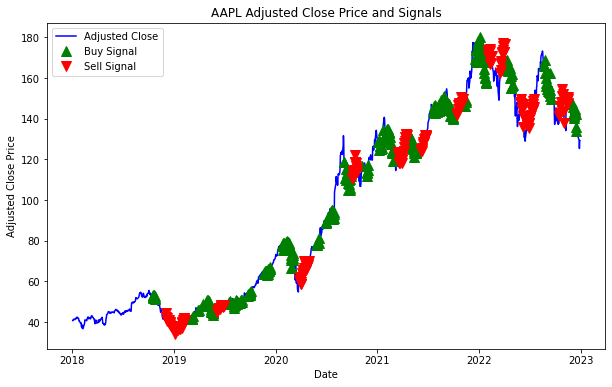

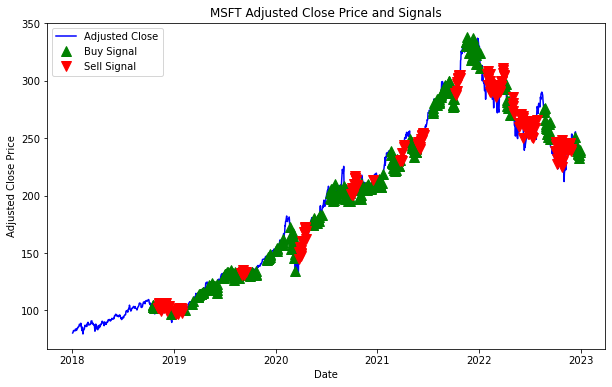

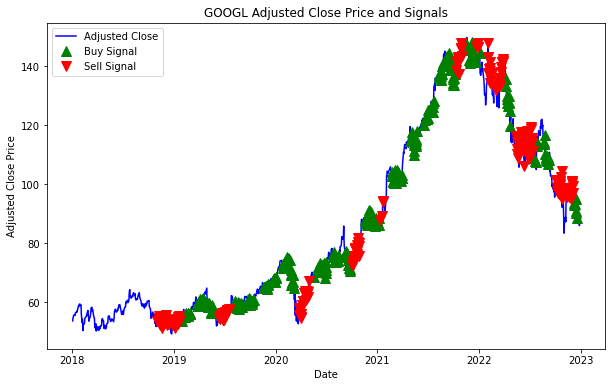

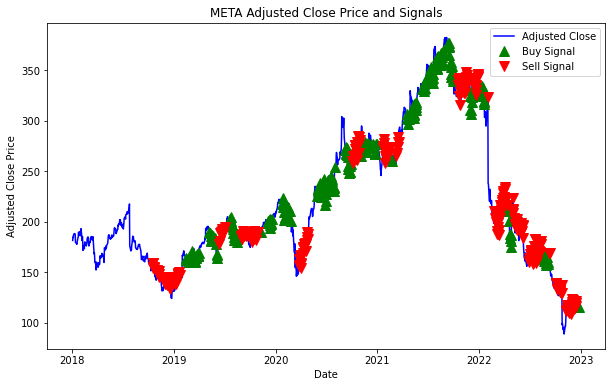

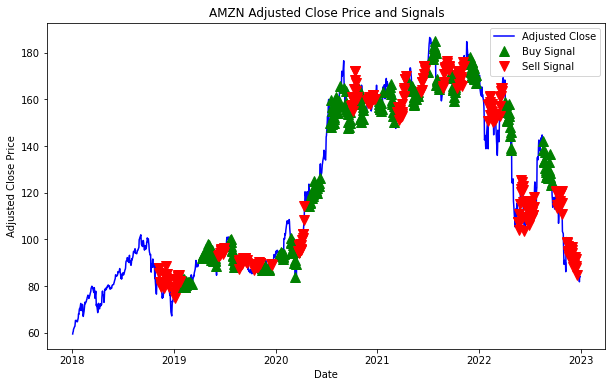

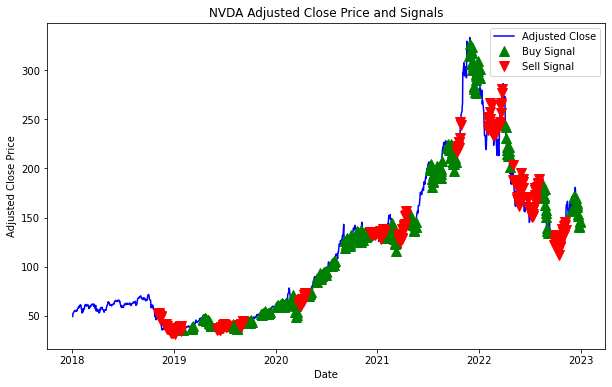

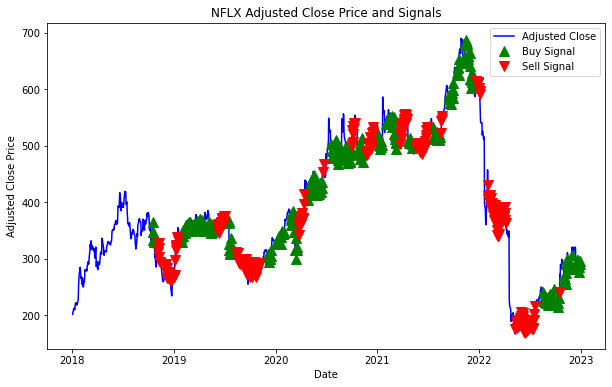

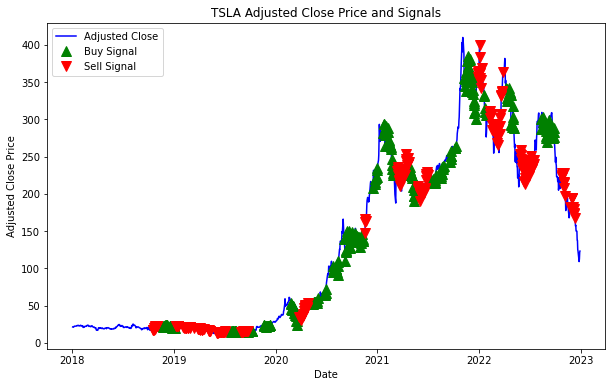

In [24]:
#포지션 진입 구간 마커로 표시 

for ticker in tickers:
    fig, ax = plt.subplots(figsize=(10, 6))

    # 조정 종가 데이터 그리기
    ax.plot(adj_price_df[ticker], label='Adjusted Close', color='blue')

    # 매수 신호 추출 및 numpy 배열로 변환
    buy_signals = combined_position_df[ticker] == 1
    buy_indices = combined_position_df[buy_signals].index.to_numpy()

    # 매도 신호 추출 및 numpy 배열로 변환
    sell_signals = combined_position_df[ticker] == -1
    sell_indices = combined_position_df[sell_signals].index.to_numpy()

    # 매수 포지션을 녹색 점으로 표시 (adj_price_df의 값을 numpy 배열로 변환)
    ax.plot(buy_indices, adj_price_df[ticker].loc[buy_indices].to_numpy(), '^', markersize=10, color='g', label='Buy Signal')

    # 매도 포지션을 빨간 점으로 표시 (adj_price_df의 값을 numpy 배열로 변환)
    ax.plot(sell_indices, adj_price_df[ticker].loc[sell_indices].to_numpy(), 'v', markersize=10, color='r', label='Sell Signal')

    # 그래프 타이틀 및 레이블
    ax.set_title(f'{ticker} Adjusted Close Price and Signals')
    ax.set_xlabel('Date')
    ax.set_ylabel('Adjusted Close Price')
    ax.legend()

    # 그래프 표시
    plt.show()


In [20]:
combined_position_df

,AAPL,MSFT,GOOGL,META,AMZN,NVDA,NFLX,TSLA
Date,,,,,,,,
2018-10-16,1,1,0,-1,0,0,1,0
2018-10-17,1,1,0,-1,0,0,1,0
2018-10-18,1,1,0,-1,0,0,1,-1
2018-10-19,1,1,0,-1,0,0,1,-1
2018-10-22,1,1,0,-1,0,0,1,-1
...,...,...,...,...,...,...,...,...
2022-12-23,0,1,0,0,0,1,1,0
2022-12-27,0,1,0,0,0,1,1,0
2022-12-28,0,1,0,1,0,1,1,0
